I'm currently following the very well designed MOOC about cooking and physics by Harvard called [Science & Cooking: From Haute Cuisine to Soft Matter Science (part 1)](https://www.edx.org/course/science-cooking-haute-cuisine-soft-harvardx-spu27-1x-0).
In week 2, there's a discussion about how to cook an egg according to the amount of heat you're giving the egg ([video here](https://www.youtube.com/watch?v=ZvfareX_rcY)). The idea is: using the specific heat value for the egg allows you to cook it very precisely. Let's explore this in this notebook.

# Theory 

The idea is that when you put an egg and boiling water together in a container, the water will cool down and transfer all its heat to the egg. A simple equation states this transformation with the following symbols:

$$
Q_{egg} = Q_{water}
$$

Now, if you take into account that some of the heat by the water is lost in the container and surrounding air, this becomes:

$$
Q_{egg} = (1-\alpha) Q_{water}
$$

Plugging in the specific heats and masses, you get the following equation.

$$
m_c c_e (T_f - 23) = (1-\alpha) m_w c_w (100 - T_f)
$$

In this equation, the subscript $e$ refers to the egg, the $w$ to the water and the symbols $m$ and $c$ to mass and specific heat. $T_f$ is the final temperature the (water and egg) system reaches in this experiment.

Solving for $T_f$ yields:

$$
T_f = \frac{m_e c_e 23 + (1-\alpha) m_w c_w 100}{m_e c_e + (1-\alpha) m_w c_w}
$$

Alright, now that we have an equation, let's draw a curve. I've just measured my egg to weigh 54 grams, the specific heat of an egg is 3.18 J/(g.K) and the specific heat of water is 4.18 J/(g.K). 

In [1]:
from IPython.display import Image

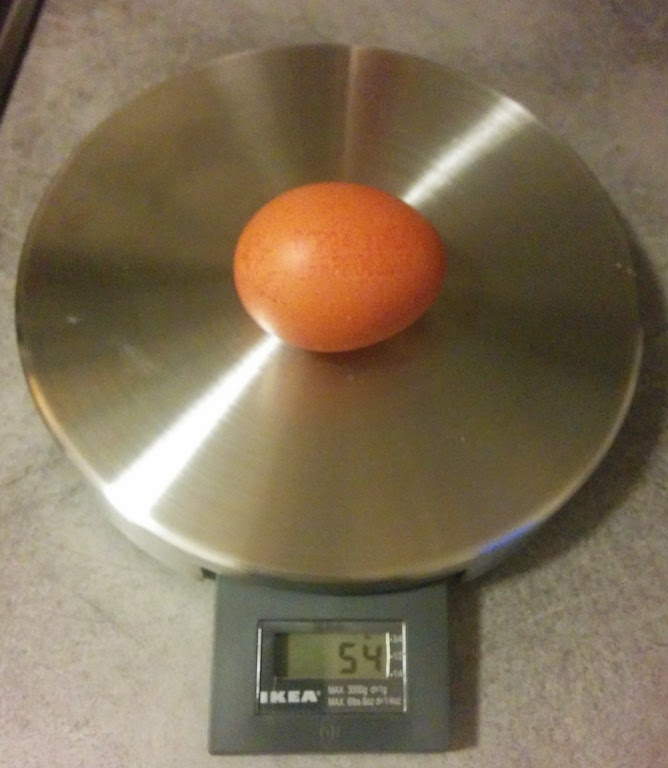

In [2]:
Image('files/egg_weight.jpg')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

In [4]:
mece = 54 * 3.18
cw = 4.18

Let's first set the heat loss coefficient to zero.

In [5]:
alpha = 0

In [6]:
mw = np.linspace(0, 100, num=200)

And now, let's plot the final temperature as a function of water mass added.

In [7]:
Tf = (mece * 23 + (1-alpha) * mw * cw * 100) / (mece + (1-alpha) * mw * cw)

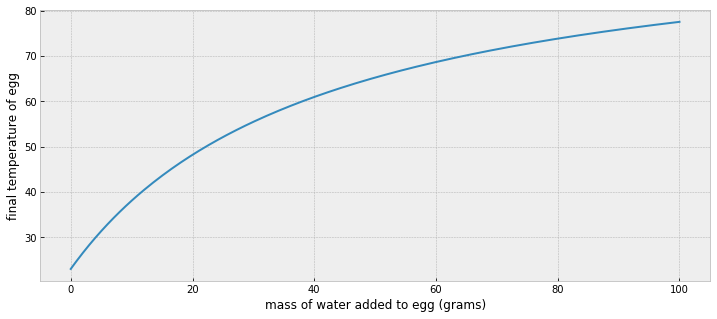

In [8]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(mw, Tf)
ax.set_xlabel('mass of water added to egg (grams)')
ax.set_ylabel('final temperature of egg');

As you can see in the diagram above, if there's no heat loss, we expect the egg to be perfectly cooked at 64 degrees C (more on why I chose this temperature at the end of this post) by adding a mass of water of:

In [9]:
mw[np.argmin(np.abs(Tf - 64))]

46.733668341708537

46 grams.

Since I'm not sure about what the heat loss coefficient is, let's plot a couple of curves with heat loss between 10 and 30% taken into account:

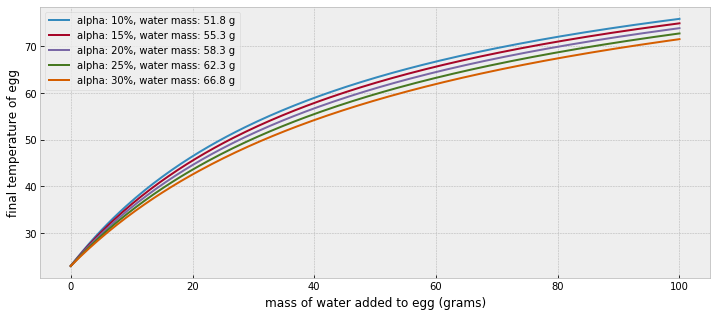

In [10]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.set_xlabel('mass of water added to egg (grams)')
ax.set_ylabel('final temperature of egg');

alphas = [.10, .15, .20, .25, .30]
for alpha in alphas:
    Tf = (mece * 23 + (1-alpha) * mw * cw * 100) / (mece + (1-alpha) * mw * cw)
    water_mass = mw[np.argmin(np.abs(Tf - 64))]
    ax.plot(mw, Tf, label='alpha: {:.0f}%, water mass: {:.1f} g'.format(alpha*100, water_mass))
    
ax.legend()

So depending on the heat loss, I would have to add somewhere between 5 to 20 grams more to my egg to cook it.

Since I have no idea about the heat loss that will effectively go on, let's use 58 grams of water to try and get the egg to be 64°C. 

# Practice 

Here's the picture where I weighed the boiling water:

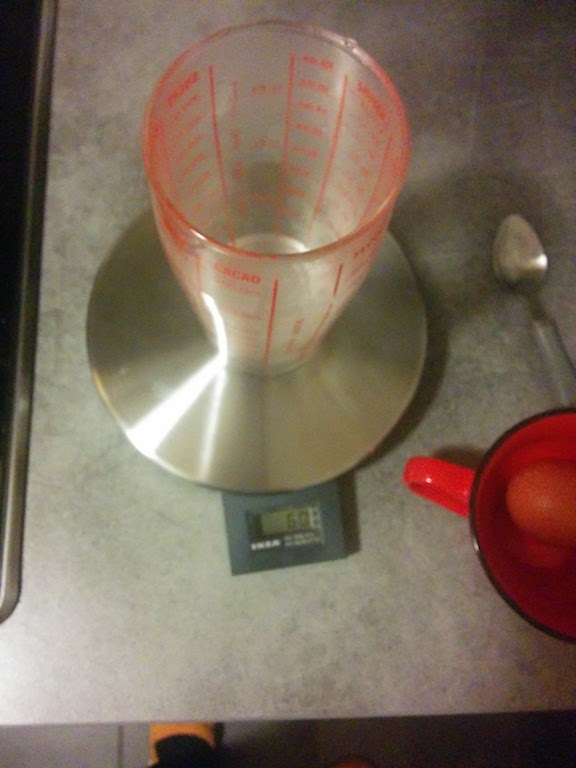

In [11]:
Image('files/water_weight.jpg')

Then I put the water and the egg in a cup (note I used some aluminium foil to insulate the cup):

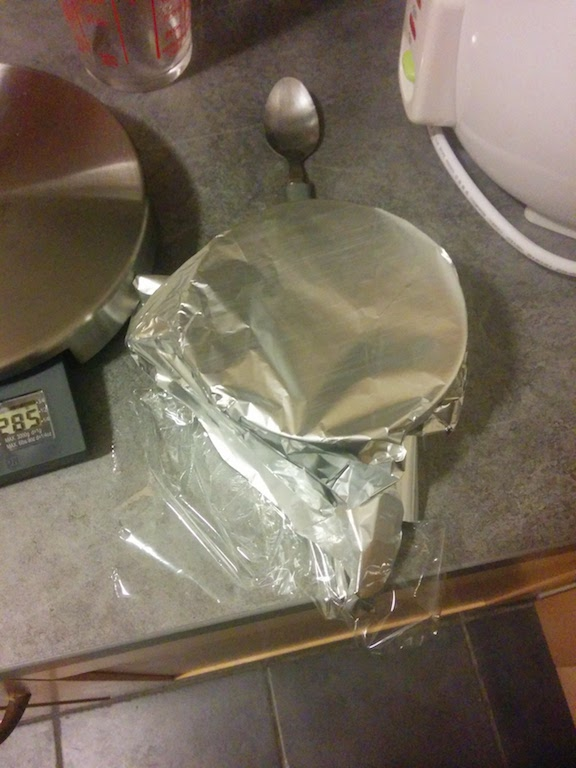

In [12]:
Image('files/water_egg_cup.jpg')

And here's what it looked like after a couple of minutes:

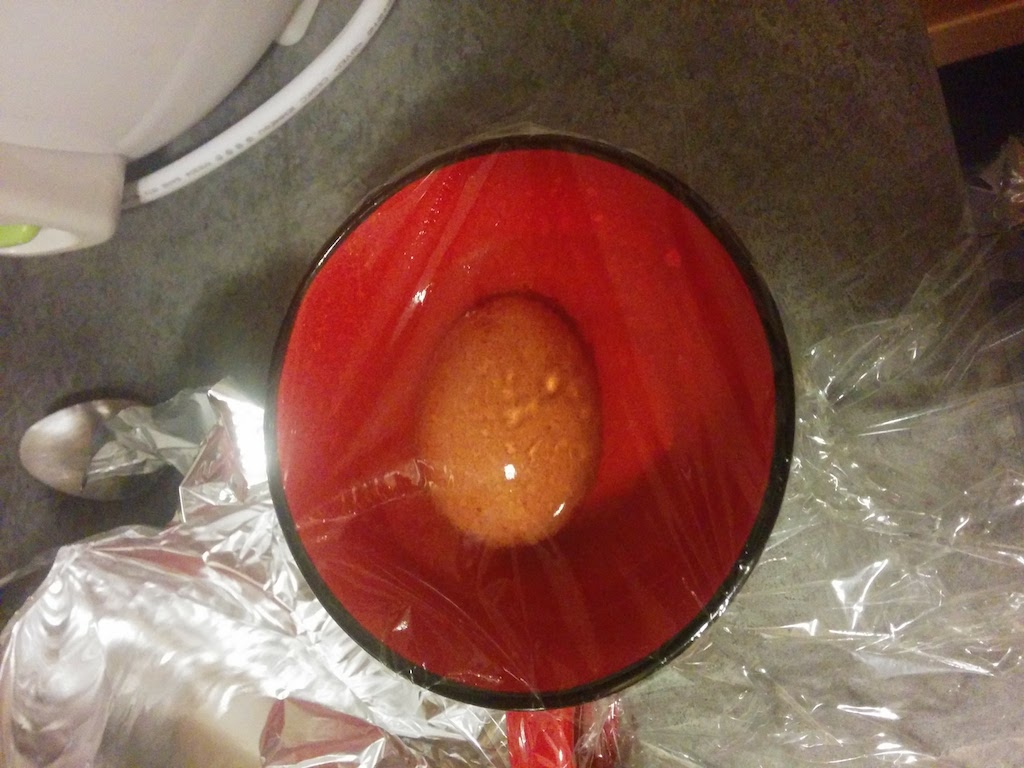

In [13]:
Image('files/after_cooking.jpg')

As you can see, there's drops of water on the plastic film that I put on top of the cup. That means that a lot of heat was exchanged at that place, meaning quite a lot of heat loss. Let's see what the egg looks like:

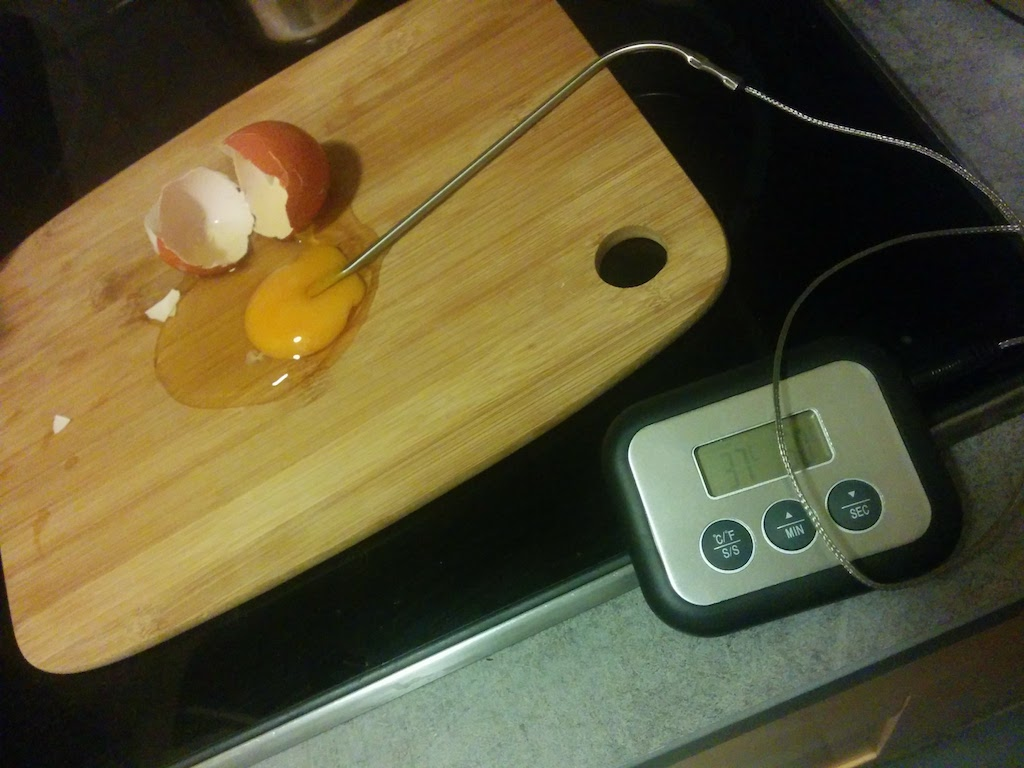

In [14]:
Image('files/egg_temperature.jpg')

Oh no! It's undercooked. So the heat loss was larger than 20%! YOu can see that the final temperature of the egg is only 37°C. I also measured the temperature of the water, which was 41°C. Taking the mean of both measurements to be the final temperature, we can find a better value for the heat loss.

# Finding a more accurate heat loss factor 

Let's plot the final temperature as a function of the heat loss factor.

In [15]:
alphas = np.linspace(0, 1)
mw = 60
Tf = (mece * 23 + (1-alphas) * mw * cw * 100) / (mece + (1-alphas) * mw * cw)

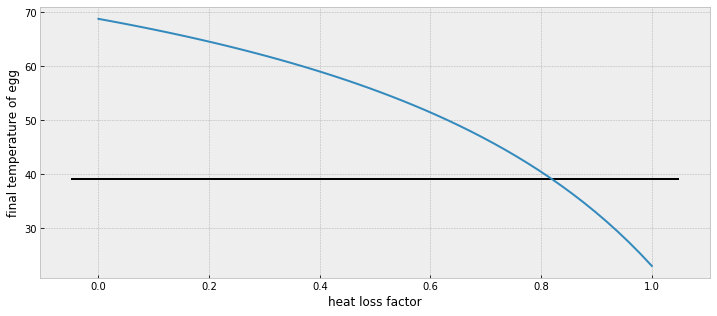

In [16]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.set_xlabel('heat loss factor')
ax.set_ylabel('final temperature of egg');

ax.plot(alphas, Tf, label='alpha: {:.0f}%, water mass: {:.1f} g'.format(alpha*100, water_mass))

ax.hlines((37+41)/2, *ax.get_xlim())

According to this diagram, the heat loss factor was above 0.8, meaning that only less than 20% of the heat I supplied to the egg was actually used! I really need to find a better setup for this... or a better explanation for where the heat losses come from!

Because I can propose better explanation for the losses: the cup I put the egg and boiling water into felt warm when I touched it. So a better explanation would be that the heat brought by the boiling water goes into the egg and the cup. The cup weights 216 grams and is made out of ceramic. According to this website ([Ceramic or glass coffee cups?](https://driftaway.coffee/coffeecup/), the specific heat for a ceramic cup is .9 J/g.K. Therefore we can compute the heat that went into the cup if we assume it also heated up to 40 degrees.

In [17]:
q_cup = 216 * .9 * (39 - 23)
q_cup

3110.4

If we compare that to the heat that went into the egg:

In [18]:
q_egg = mece * (39 - 23)
q_egg

2747.52

According to that calculation, the cup has used up more heat than the egg itself!

Let's estimate the heat losses with this new value:

$$
Q_{egg} + Q_{cup} + Q_{losses} = Q_{water}
$$

In [19]:
q_water = mw * cw * (100 - 39)

The losses are:

In [20]:
q_losses = q_water - q_egg - q_cup
q_losses

9440.88

In [21]:
q_losses / q_water

0.6170993803435564

More than half the heat losses are not accounted for by the egg and cup heating. That leaves still a lot of heat loss unaccounted for. At this point, I'm stopping the computations. One weak hypothesis in the line of reasoning I've been following is that I didn't measure the temperature of the cup but only felt it with my fingers and assumed it was the same than the water. The cup could actually been hotter than what I put in the calculation. 

Let's use this new insight to do a second experiment. Let's cook another egg!

# Cooking a second egg with some more insights 

This time, the egg I'm going to cook weights 55 grams. Its starting temperature is 20 degrees Celsius. So, to get it to 64 °C, I need this many calories:

In [22]:
mece = 55 * 3.18

mece * (64 - 20)

7695.6

If we account with a loss factor of 60%, as computed above, we thus need:

In [23]:
alpha = .6

In [24]:
mw = np.linspace(0, 200, num=500)
Tf = (mece * 20 + (1-alpha) * mw * cw * 100) / (mece + (1-alpha) * mw * cw)
water_mass = mw[np.argmin(np.abs(Tf - 64))]

In [25]:
water_mass

127.8557114228457

Due to weighing problems, I added 135 grams of boiling water to the egg. Here's what it looks like after cooking:

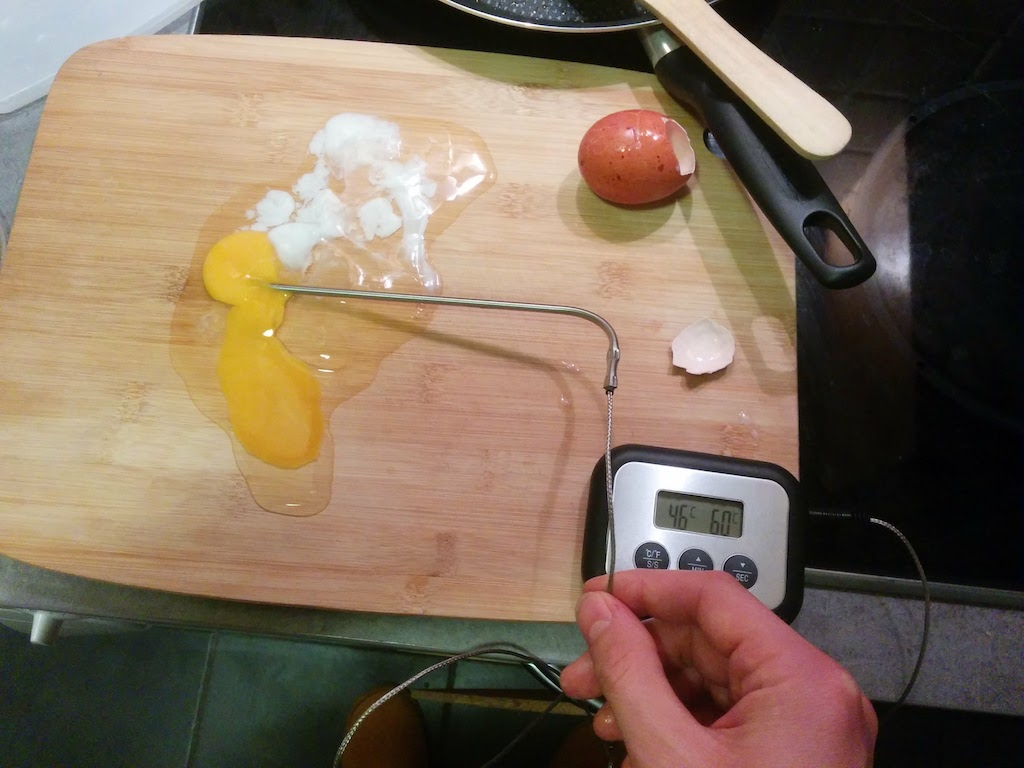

In [26]:
Image('files/egg_second_try.jpg')

Again, the egg didn't reach 64°C. In fact, I only got 46°C, as can be seen in the picture. At least, there was a little bit of progress, since some of the egg white coagulated and formed little white structures. I'll finish this experiment here, unfortunately ending in failure...

# Conclusions 

I hope you had fun reading this little kitchen experiment. As it turned out, there is a lot of heat loss in this way of cooking an egg. So it's not suitable for your everyday egg-cooking... In fact, there are several possible explanations about why this experiment did not give the right results:

- heat loss: even though I tried to account for heat loss, I guess it is quite difficult to control with just a mug (in fact, using a ceramic mug might even be a bad idea compared to other materials, since I'm losing a lot of heat due to that)
- kinetics of heat: even though I can compute how much heat is needed to reach the equilibrium temperature, I don't actually know when the equilibrium is reached

That being said, I highly recommend the above-cited MOOC if you want more things like this. Let's end this blog article with the video from the MOOC (and chef Dave Arnold) that demonstrates what a difference a degree can make when cooking an egg:

In [27]:
from IPython.display import YouTubeVideo

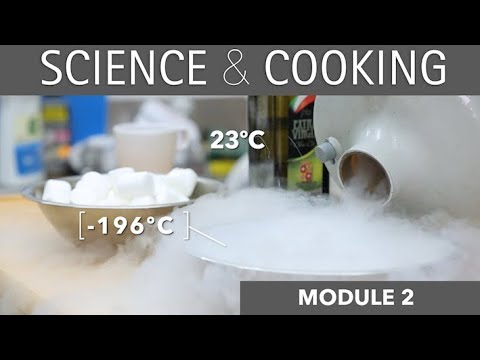

In [28]:
YouTubeVideo('9cR7M-xs40M')

*This post was entirely written using the IPython notebook. Its content is BSD-licensed. You can see a static view or download this notebook with the help of nbviewer at [20171103_CookingAnEggWithMath](http://nbviewer.ipython.org/urls/raw.github.com/flothesof/posts/master/20171103_CookingAnEggWithMath).*